# Fraud Data Set

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [26]:
df=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Fraud_check.csv')

In [27]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [28]:
df.shape

(600, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [30]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [31]:
df1=df.rename(columns={'Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'})

In [32]:
df1

,Undergrad,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [33]:
#Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df1.copy()
df1['taxable_category'] = pd.cut(x = df1['TI'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,MS,TI,CP,WE,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


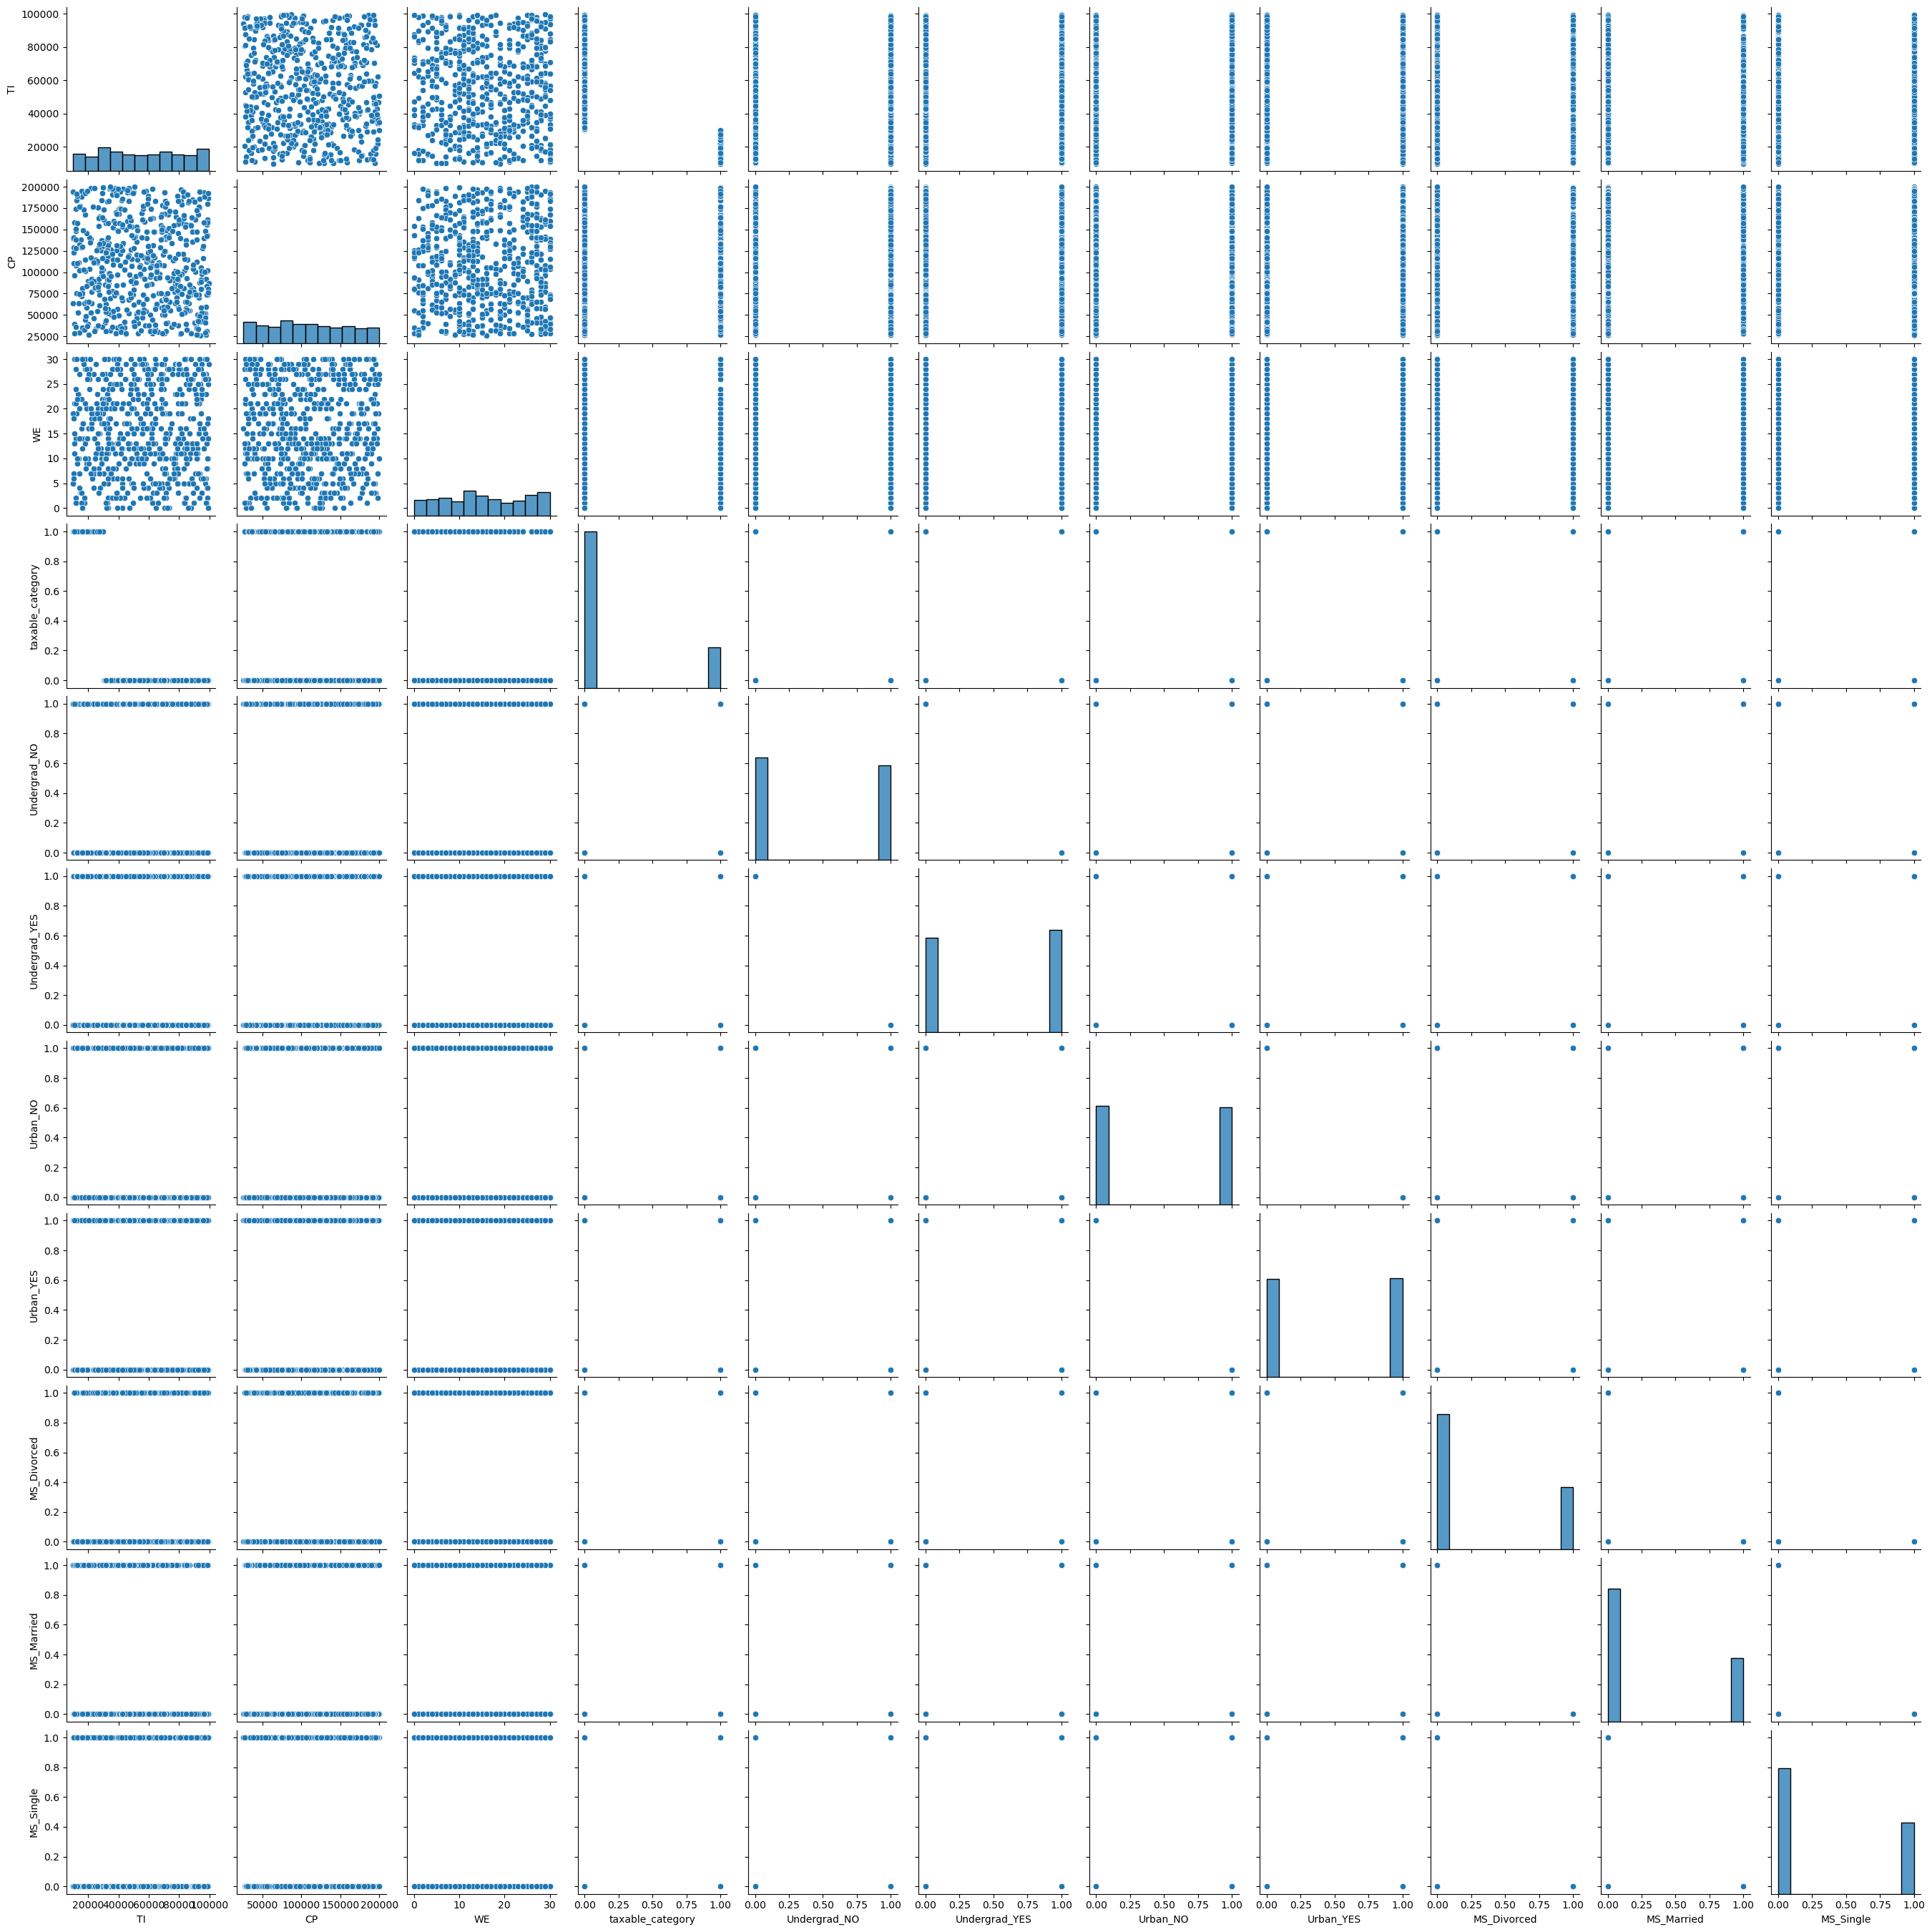

In [60]:
#ploting pairplot
sns.pairplot(data=df1);
plt.show()

In [36]:
df1=pd.get_dummies(df1,columns=['Undergrad','Urban','MS'])

In [37]:
df1

,TI,CP,WE,taxable_category,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,MS_Divorced,MS_Married,MS_Single
0,68833,50047,10,Good,1,0,0,1,0,0,1
1,33700,134075,18,Good,0,1,0,1,1,0,0
2,36925,160205,30,Good,1,0,0,1,0,1,0
3,50190,193264,15,Good,0,1,0,1,0,0,1
4,81002,27533,28,Good,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,Good,0,1,0,1,1,0,0
596,69967,55369,2,Good,0,1,0,1,1,0,0
597,47334,154058,0,Good,1,0,0,1,1,0,0
598,98592,180083,17,Good,0,1,1,0,0,1,0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   TI                600 non-null    int64   
 1   CP                600 non-null    int64   
 2   WE                600 non-null    int64   
 3   taxable_category  600 non-null    category
 4   Undergrad_NO      600 non-null    uint8   
 5   Undergrad_YES     600 non-null    uint8   
 6   Urban_NO          600 non-null    uint8   
 7   Urban_YES         600 non-null    uint8   
 8   MS_Divorced       600 non-null    uint8   
 9   MS_Married        600 non-null    uint8   
 10  MS_Single         600 non-null    uint8   
dtypes: category(1), int64(3), uint8(7)
memory usage: 19.0 KB


In [39]:
label_encoder = preprocessing.LabelEncoder()
df1['taxable_category']=label_encoder.fit_transform(df1['taxable_category'])
df1

,TI,CP,WE,taxable_category,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,MS_Divorced,MS_Married,MS_Single
0,68833,50047,10,0,1,0,0,1,0,0,1
1,33700,134075,18,0,0,1,0,1,1,0,0
2,36925,160205,30,0,1,0,0,1,0,1,0
3,50190,193264,15,0,0,1,0,1,0,0,1
4,81002,27533,28,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,0,1,0,1,1,0,0
596,69967,55369,2,0,0,1,0,1,1,0,0
597,47334,154058,0,0,1,0,0,1,1,0,0
598,98592,180083,17,0,0,1,1,0,0,1,0


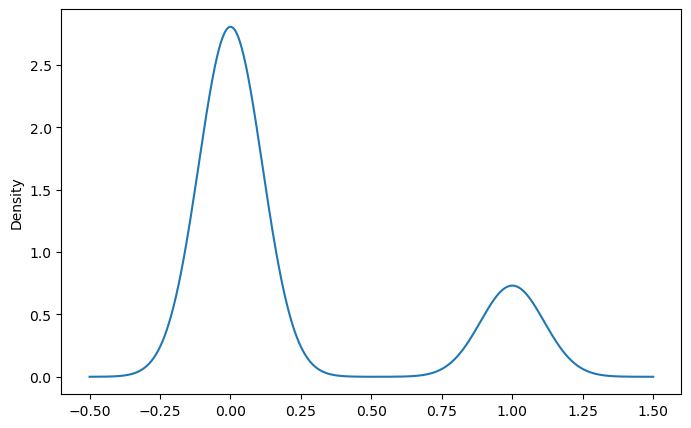

In [40]:
df1['taxable_category'].plot(kind='kde', figsize=(8,5))
plt.show()

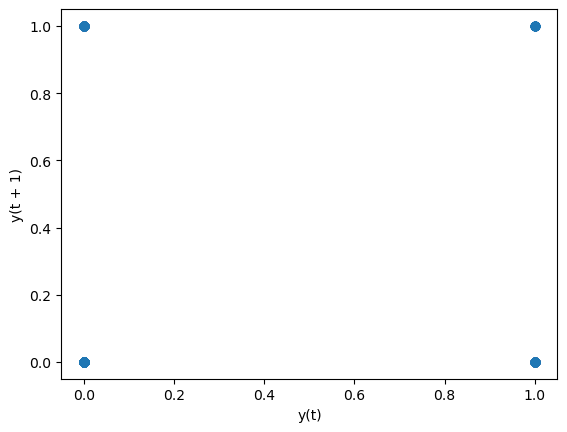

In [41]:
from pandas.plotting import lag_plot
lag_plot(df1['taxable_category'])
plt.show()

In [61]:
X=df1.drop(["taxable_category"],axis=1)
Y=df1['taxable_category']

In [62]:
df1.taxable_category.unique()

array([0, 1])

In [63]:
df1.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [64]:
colnames = list(df1.columns)
colnames

['TI',
 'CP',
 'WE',
 'taxable_category',
 'Undergrad_NO',
 'Undergrad_YES',
 'Urban_NO',
 'Urban_YES',
 'MS_Divorced',
 'MS_Married',
 'MS_Single']

In [65]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria


In [66]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

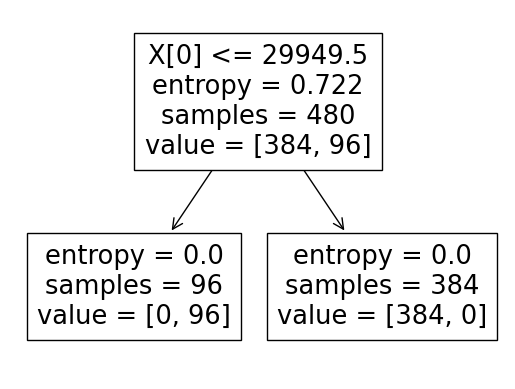

In [67]:
#PLot the decision tree
tree.plot_tree(model);
plt.show()

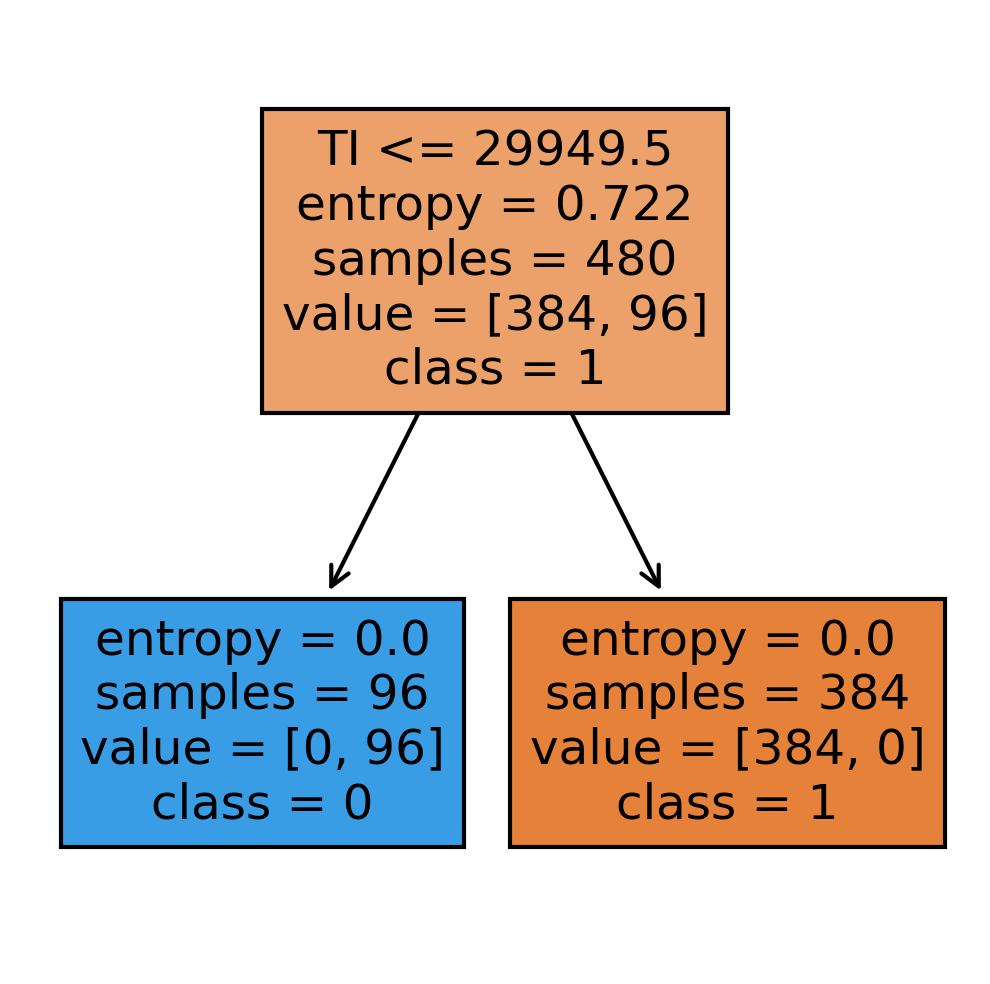

In [68]:
fn=['TI','CP','WE','taxable_category','Undergrad_NO','Undergrad_YES','rban_NO','Urban_YES','MS_Divorced','MS_Married','MS_Single']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [69]:
#predicting on test data
pred=model.predict(x_test)

In [70]:
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [71]:
#Accuracy
np.mean(pred==y_test)

1.0

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Building Decision Tree Classifier (CART) using Gini Criteria


In [73]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(max_depth=3)

In [74]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0

## Building Decision Tree Classifier (CART) using Gini Criteria

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [77]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0